Importing necessary libraries and packages

In [0]:
!pip install scikit-learn
!pip install 'nltk==3.4.5'

     |████████████████████████████████| 1.5MB 3.5MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449905 sha256=9ea7e93933754684ed34bb11e475881b404969605c182e8d36bc76eb2b0f4402
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [0]:
import re
from sklearn.model_selection import train_test_split

In [0]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers.recurrent import SimpleRNN
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from tensorflow.keras import layers

Using TensorFlow backend.


Getting dataset from Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "drive/My Drive/Colab Dataset/IMDB-Dataset.csv"
IMDBFull = pd.read_csv(path)

Pre-processing the text, removing unwanted spaces and punctuations

In [0]:
def preprocess_text(sen):
    sentence = remove_tags(sen)
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [0]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [0]:
X = []
sentences = list(IMDBFull['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [0]:
y = IMDBFull['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

Train-Test split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [0]:
X_train,X_val,y_train,Y_val=train_test_split(X_train,y_train,test_size=0.375)

Tokenizing the words to sequences and then padding to set maximum length limit

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val=tokenizer.texts_to_sequences(X_val)

In [0]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)

Creation of Sequential model with Simple RNN layer

In [0]:
embedding_vector_len = 64
num_words=5000
model = Sequential()
model.add(Embedding(num_words, embedding_vector_len, input_length=max_words))
model.add(SimpleRNN(256, return_sequences=False, unroll=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 402,433
Trainable params: 402,433
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history = model.fit(X_train, y_train, validation_data=(X_val, Y_val), epochs=5, batch_size=512)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 15000 samples
Epoch 1/5
25000/25000 [==============================] - 168s 7ms/step - loss: 0.7190 - accuracy: 0.5086 - val_loss: 0.6904 - val_accuracy: 0.5052
Epoch 2/5
25000/25000 [==============================] - 162s 6ms/step - loss: 0.6855 - accuracy: 0.5410 - val_loss: 0.6741 - val_accuracy: 0.5954
Epoch 3/5
25000/25000 [==============================] - 162s 6ms/step - loss: 0.6517 - accuracy: 0.6312 - val_loss: 0.6506 - val_accuracy: 0.6054
Epoch 4/5
25000/25000 [==============================] - 161s 6ms/step - loss: 0.6001 - accuracy: 0.6860 - val_loss: 0.6292 - val_accuracy: 0.6311
Epoch 5/5
25000/25000 [==============================] - 161s 6ms/step - loss: 0.5745 - accuracy: 0.6992 - val_loss: 0.6301 - val_accuracy: 0.6374


In [0]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

10000/10000 [==============================] - 21s 2ms/step
Test Loss: 0.6277997374534607
Test Accuracy: 0.6352999806404114


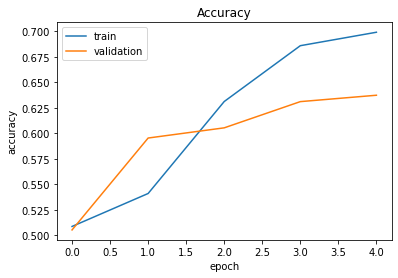

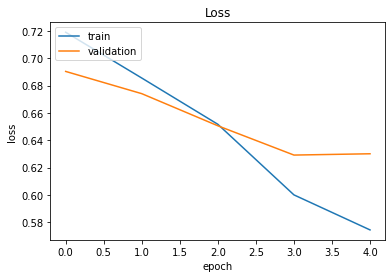

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()